# Temat testów

1. Poprawność

HO: Brak istotnej statystycznie różnicy w poprawności odpowiedzi między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w poprawności odpowiedzi między grupami grafik A i B.

2. Trudność

HO: Brak istotnej statystycznie różnicy w trudności zadania między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w trudności zadania między grupami grafik A i B.

3. Czas odpowiedzi

HO: Brak istotnej statystycznie różnicy w czasie odpowiedzi między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w czasie odpowiedzi między grupami grafik A i B.

Poziom istotności: $\alpha=0.05$

In [2]:
import pandas as pd

from functions.tests.dependent_groups.two_groups import wilcoxon_test, ttest_or_wilcoxon, mcnemar_test
from functions.plots import plot_heatmap, plot_two_boxplots, plot_two_density
from functions.set_preparations import prepare_row

In [3]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv', index_col='ID')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv', index_col='ID')

Sety:
- kolekcja A vs kolekcja B
- suma A vs suma B
- 1a vs 1b
- 2a vs 2b
- 3a vs 3b

In [4]:
# przygotowanie kolekcji - reszta setów już jest
corrA = prepare_row(df_answers.filter(regex='.*a_corr$'))
confA = prepare_row(df_answers.filter(regex='.*a_trud$'))
timeA = prepare_row(df_time.filter(regex='^Duration.*a'))
corrB = prepare_row(df_answers.filter(regex='.*b_corr$'))
confB = prepare_row(df_answers.filter(regex='.*b_trud$'))
timeB = prepare_row(df_time.filter(regex='^Duration.*b'))
df_coll = pd.DataFrame({'corr_A': corrA, 'corr_B': corrB, 'diff_A': confA, 'diff_B': confB, 'time_A': timeA, 'time_B': timeB})

df_coll.head()

,corr_A,corr_B,diff_A,diff_B,time_A,time_B
0,1,1,3,1,34682,96628
1,1,1,1,2,53564,33598
2,1,1,2,1,85546,33632
3,1,1,3,2,61197,30882
4,1,1,4,2,42031,30282


In [5]:
ALPHA = 0.05

Poprawność A vs B

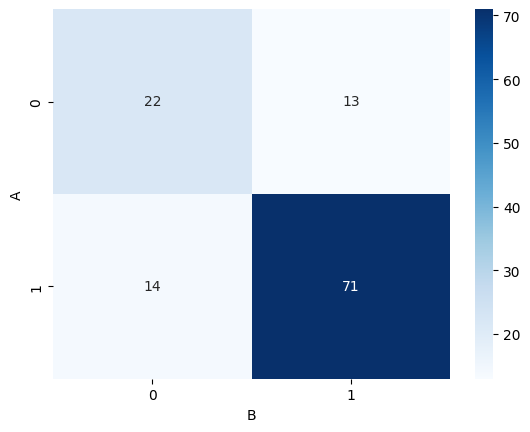

corr_B   0   1
corr_A        
0       22  13
1       14  71
McNemar statistic: 13.0
p-value: 1.0
Brak podstaw do odrzucenia H0.


In [8]:
# kolekcje
var1 = 'corr_A'
var2 = 'corr_B'
plot_heatmap(df_coll, var1, var2, 'A', 'B', cmap='Blues')
mcnemar_test(df_coll, var1, var2, ALPHA)

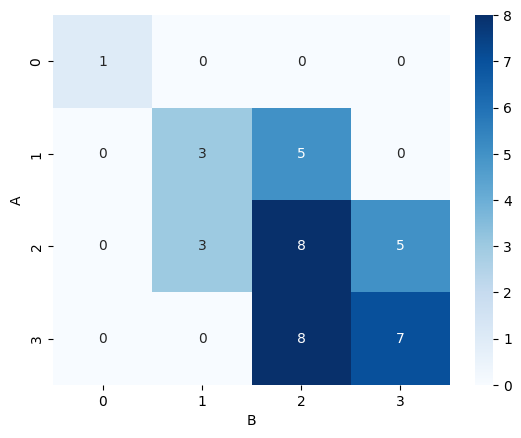

SumCorr_b  0  1  2  3
SumCorr_a            
0          1  0  0  0
1          0  3  5  0
2          0  3  8  5
3          0  0  8  7
McNemar statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.


In [9]:
# sumy
var1 = 'SumCorr_a'
var2 = 'SumCorr_b'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
mcnemar_test(df_answers, var1, var2, ALPHA)

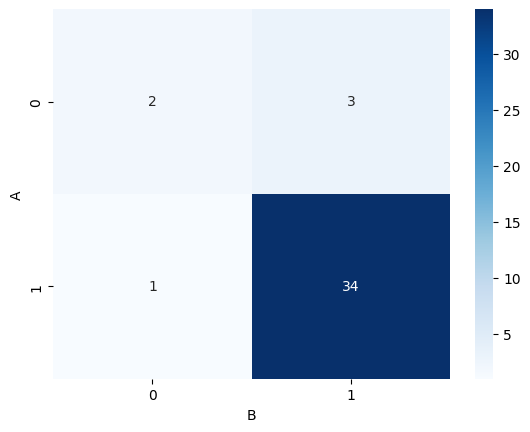

1b_corr  0   1
1a_corr       
0        2   3
1        1  34
McNemar statistic: 1.0
p-value: 0.625
Brak podstaw do odrzucenia H0.


In [10]:
# 1
var1 = '1a_corr'
var2 = '1b_corr'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
mcnemar_test(df_answers, var1, var2, ALPHA)

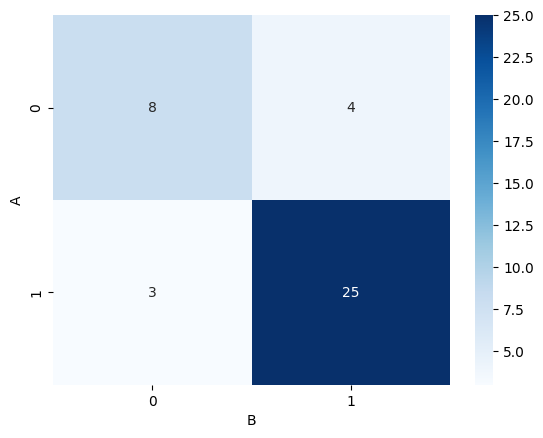

2b_corr  0   1
2a_corr       
0        8   4
1        3  25
McNemar statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.


In [11]:
# 2
var1 = '2a_corr'
var2 = '2b_corr'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
mcnemar_test(df_answers, var1, var2, ALPHA)

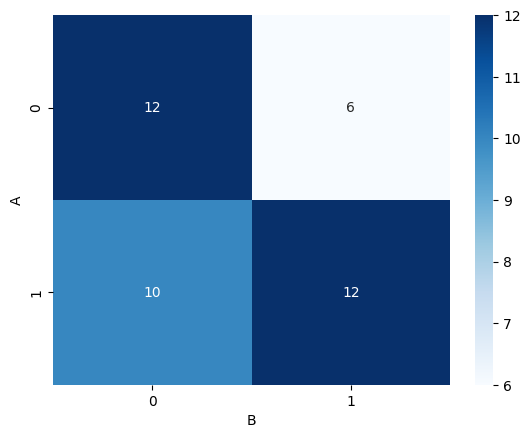

3b_corr   0   1
3a_corr        
0        12   6
1        10  12
McNemar statistic: 6.0
p-value: 0.454498291015625
Brak podstaw do odrzucenia H0.


In [12]:
# 3
var1 = '3a_corr'
var2 = '3b_corr'
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')
mcnemar_test(df_answers, var1, var2, ALPHA)

Trudność - A vs B

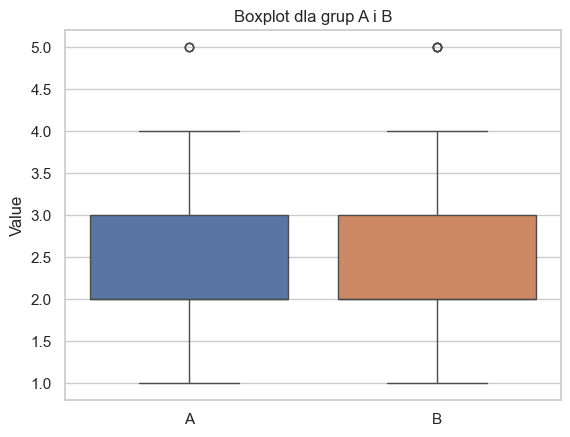

Wilcoxon statistic: 1584.5
p-value: 0.5745636497346267
Brak podstaw do odrzucenia H0.


In [13]:
# kolekcje
var1 = 'diff_A'
var2 = 'diff_B'
plot_two_boxplots(df_coll[var1], df_coll[var2])
wilcoxon_test([df_coll[var1], df_coll[var2]], ALPHA)

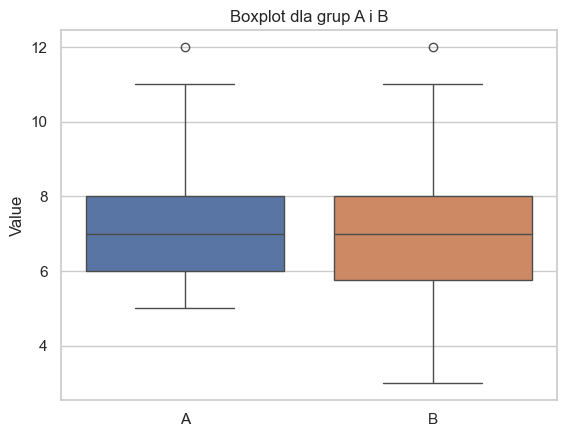

Wilcoxon statistic: 197.5
p-value: 0.47293064949196106
Brak podstaw do odrzucenia H0.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [15]:
# sumy
var1 = 'SumTrud_a'
var2 = 'SumTrud_b'
plot_two_boxplots(df_answers[var1], df_answers[var2])
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

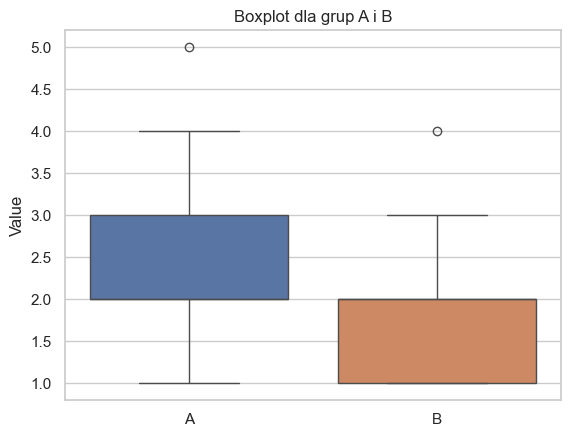

Wilcoxon statistic: 121.0
p-value: 0.009446658584125115
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [16]:
# 1
var1 = '1a_trud'
var2 = '1b_trud'
plot_two_boxplots(df_answers[var1], df_answers[var2])
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

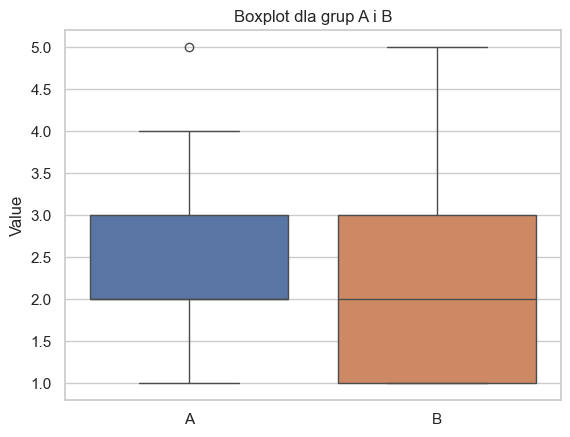

Wilcoxon statistic: 149.0
p-value: 0.32824331181008215
Brak podstaw do odrzucenia H0.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [17]:
# 2
var1 = '2a_trud'
var2 = '2b_trud'
plot_two_boxplots(df_answers[var1], df_answers[var2])
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

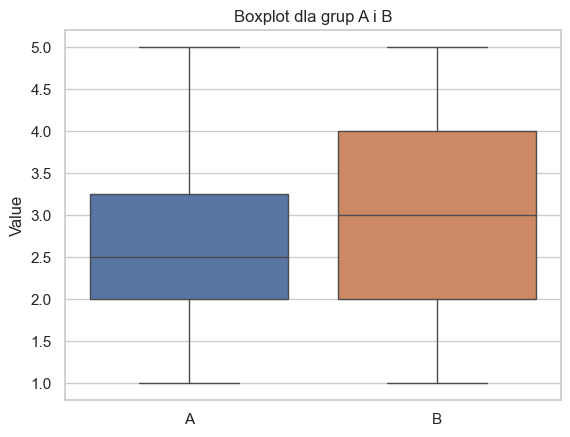

Wilcoxon statistic: 45.0
p-value: 0.001759249396365463
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [18]:
# 3
var1 = '3a_trud'
var2 = '3b_trud'
plot_two_boxplots(df_answers[var1], df_answers[var2])
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

Czas - A vs B

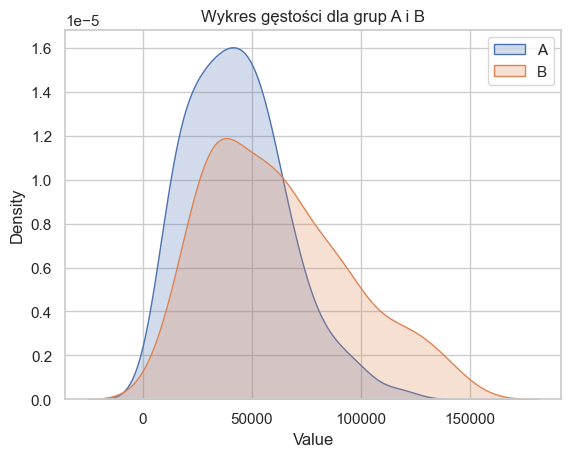

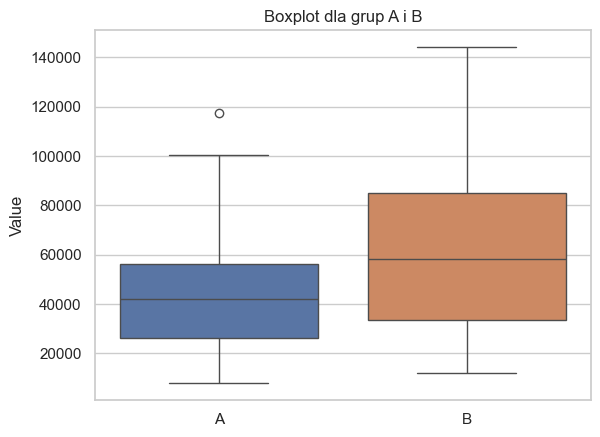

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1580.5
p-value: 8.047291306218659e-08
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [19]:
# kolekcje
var1 = 'time_A'
var2 = 'time_B'
plot_two_density(df_coll[var1], df_coll[var2])
plot_two_boxplots(df_coll[var1], df_coll[var2])
ttest_or_wilcoxon([df_coll[var1], df_coll[var2]], ALPHA)

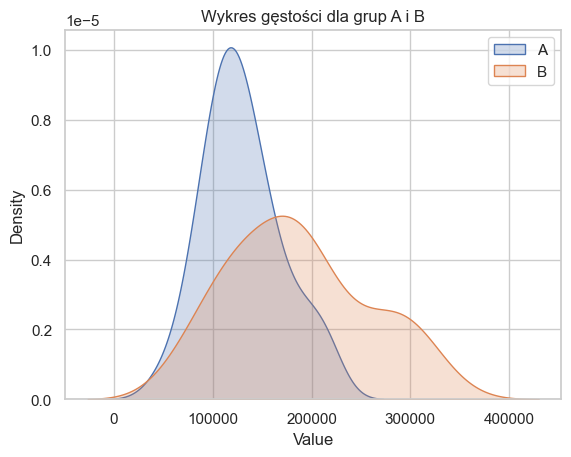

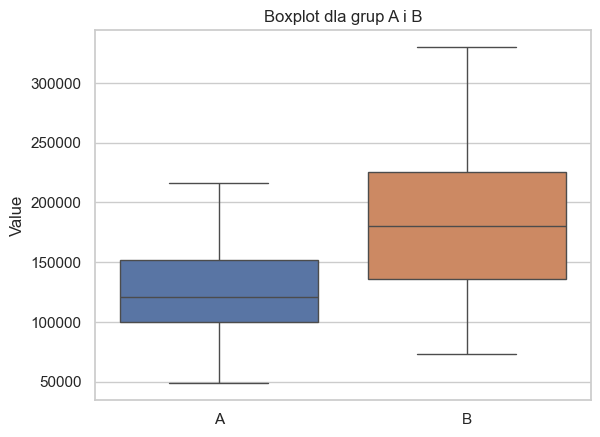

Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 78.0
p-value: 1.1621450539678335e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [20]:
# sumy
var1 = 'SumTime_a'
var2 = 'SumTime_b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1], df_time[var2])
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

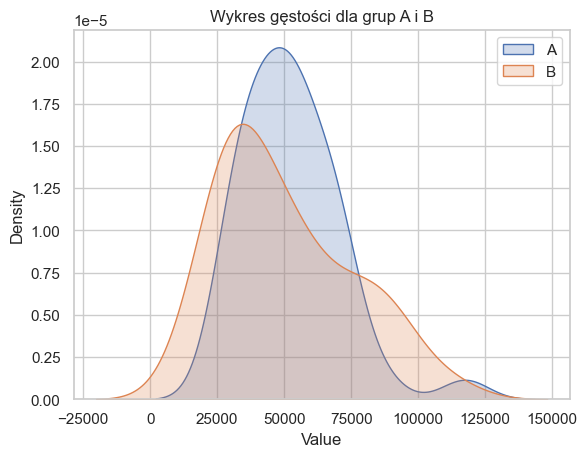

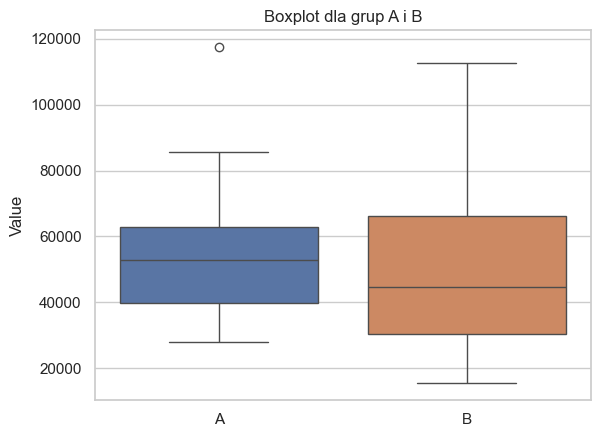

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 364.0
p-value: 0.5448004511072213
Brak podstaw do odrzucenia H0.


In [21]:
# 1
var1 = 'Duration_1a'
var2 = 'Duration_1b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1], df_time[var2])
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

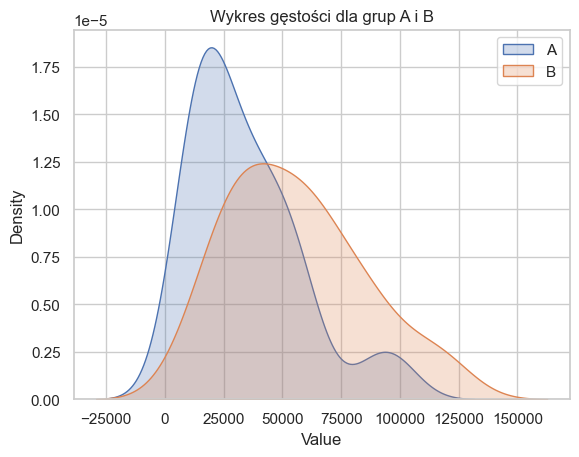

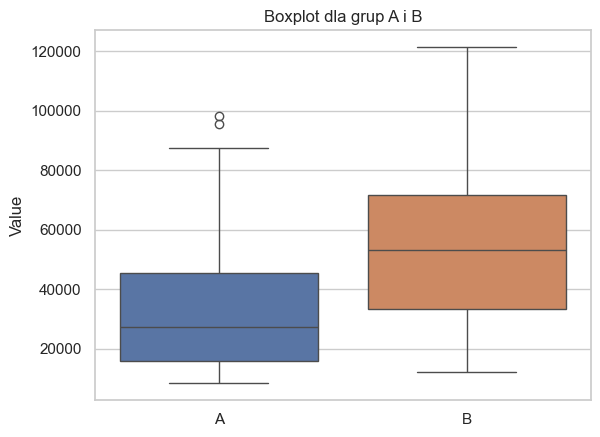

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 133.0
p-value: 9.446514923183713e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [22]:
# 2
var1 = 'Duration_2a'
var2 = 'Duration_2b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1], df_time[var2])
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

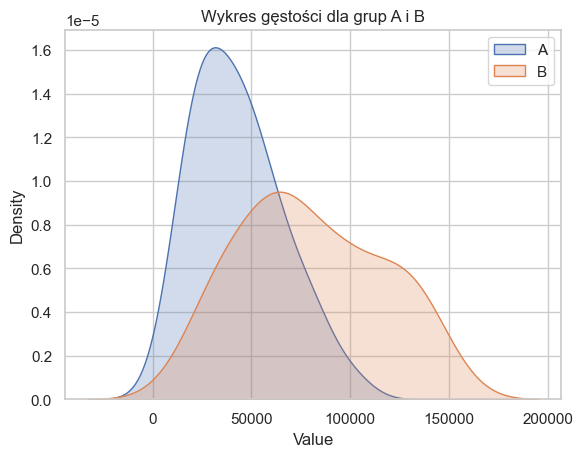

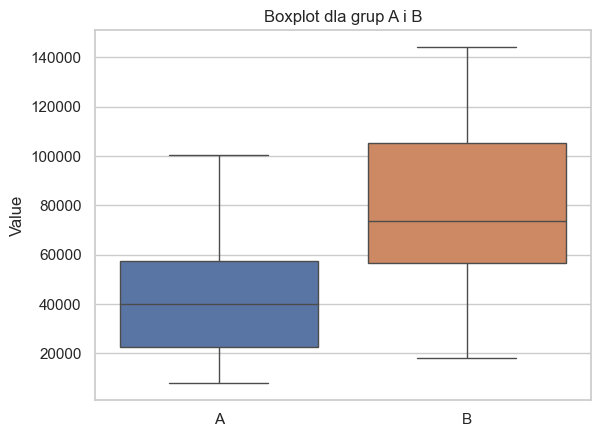

Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 34.0
p-value: 6.775735528208315e-09
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [23]:
# 3
var1 = 'Duration_3a'
var2 = 'Duration_3b'
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1], df_time[var2])
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

Podsumowanie:
Istotna różnica statystyczna występuje w:
- ocenie trudności zadania: między grupami 1a vs 1b oraz 3a vs 3b
- czasie odpowiedzi: między grupami kolekcja A vs kolekcja B, suma A vs suma B, 2a vs 2b, 3a vs 3b